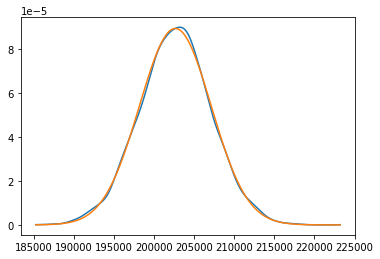

5125


In [10]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.stats import gaussian_kde
with open("/Users/maximilientirard/Documents/Processing/SnakeAI/game_lengths_fixedHamiltonianPath.txt") as f:
    content = f.readlines()
data = [int(x.strip()) for x in content]
density = gaussian_kde(data)
xs = np.linspace(min(data),max(data),len(data))
#density.covariance_factor = lambda : 2.25
#density._compute_covariance()
plt.plot(xs,density(xs))
plt.plot(xs,norm.pdf(xs, np.mean(data), np.std(data, ddof=1)))
plt.show()
print(len(data))